# Cap 3 - 3.1 - Regressão Linear

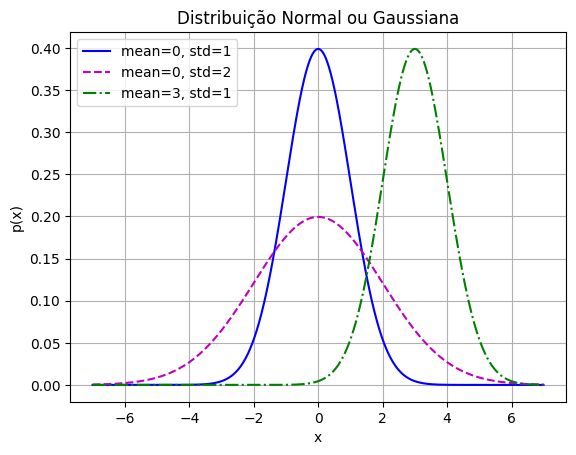

In [3]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt  # This is python's popular plotting library.


def normal(x, mu, sigma):  # Distribuição normal ou gaussiana
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

plt.plot(x,normal(x,0,1),'b-', label='mean=0, std=1')
plt.plot(x,normal(x,0,2),'m--', label='mean=0, std=2')
plt.plot(x,normal(x,3,1),'g-.', label='mean=3, std=1')

plt.legend()
plt.title('Distribuição Normal ou Gaussiana')
plt.ylabel('p(x)')
plt.xlabel('x')
plt.grid(True)
plt.show()



# # Mean and standard deviation pairs
# params = [(0, 1), (0, 2), (3, 1)]
# d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
#          ylabel='p(x)', figsize=(4.5, 2.5),
#          legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

# EXERCÍCIOS:


In [3]:
# Exercício 1:

import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt  # This is python's popular plotting library.



x = torch.rand(10)
n = x.shape
b = torch.sum(x)/n[0]
# b é dado pela derivada parcial (com relação a x) do somatório de (xi-b)^2=0, cujo resultado é:
# (1/n)*somatório de xi.

# Dado o valor de b mínimo, encontra-se a função minimizada.
func_min = torch.sum((x-b)**2)

In [4]:
# Exercício 2:
import torch

# função afim (affine): y = w.x + b
# x = torch.rand(5)
w = torch.rand(5)    # vetor de pesos
b = 1.7 # b é constante

# função afim: y = w.x + b
#  (x,1): 1 = wi.xi + b --> xi = (1-b)/wi
# ---
# função linear: y = w.x; b=0
#  (x,1): 1 = wi.xi --> xi = 1/wi
# torch.dot(x1,w1) # produto escalar entre x1 e w1
i=2
x_affine = (1 - b)/w[i]   # affine function: y = w.x + b
x_linear = 1/w[i]   # linear function: y = w.x; b=0
print(f'Afim: {x_affine}')
print(f'Linear: {x_linear}')
# ERRADO: x1_affine e x1_linear deveriam ser iguais para quaisquer valor de 'b' e 'i' em y=1: (x,1).

Afim: -0.8628300428390503
Linear: 1.2326143980026245


In [5]:
# ----------------------------------------------------------------------------------------------------
# Exercício 6:
# Chat GPT:
# The composition of two linear layers in a neural network essentially results in another linear layer. This is due
# to the property of linearity: the composition of two linear functions is another linear function.
# This means that a neural network with two linear layers has the same expressive power as a neural network with
# a single linear layer. It cannot model complex, non-linear relationships between the input and the output.
#
# To overcome this limitation, we typically introduce non-linearities between the linear layers in the form of
# activation functions, such as the ReLU (Rectified Linear Unit), sigmoid, or tanh functions. These non-linear
# activation functions allow the neural network to model complex, non-linear relationships and greatly increase
# its expressive power.

In [6]:
# ----------------------------------------------------------------------------------------------------
# Exercício 7:
# Chat GPT:
# A regressão linear pode ser usada para estimar preços de casas ou de ações, mas geralmente não produzirá estimativas realistas ou precisas por si só. Isso se deve à natureza linear da regressão linear, que assume uma relação linear direta entre as variáveis de entrada e a variável de saída. No entanto, as relações nos preços de casas ou de ações geralmente não são estritamente lineares, pois são influenciadas por uma variedade de fatores complexos e não lineares.
#
# Quando se utiliza a regressão linear para estimativas realistas de preços de casas ou de ações, é importante considerar várias limitações e desafios:
#
# 1. **Relações não lineares:** Os preços de casas ou de ações geralmente são afetados por uma combinação de fatores não lineares, como localização, condição do imóvel, tendências de mercado, fatores econômicos e políticos, entre outros. Uma regressão linear simples pode não capturar essas relações de forma precisa.
#
# 2. **Multicolinearidade:** Quando várias variáveis de entrada estão altamente correlacionadas entre si, pode ocorrer multicolinearidade. Isso pode levar a estimativas imprecisas dos coeficientes na regressão linear e afetar a interpretação dos resultados.
#
# 3. **Outliers:** Valores atípicos ou outliers nos dados podem distorcer os resultados da regressão linear, especialmente se eles influenciarem significativamente a relação entre as variáveis.
#
# 4. **Assunção de normalidade e homocedasticidade:** A regressão linear assume que os resíduos (diferença entre os valores observados e os valores preditos) seguem uma distribuição normal e têm variância constante. Essas suposições nem sempre são atendidas nos dados do mundo real.
#
# Para melhorar as estimativas realistas de preços de casas ou de ações, considera-se o uso de modelos mais avançados, como regressão polinomial, modelos lineares generalizados (GLM), regressão de séries temporais, modelos de árvore de decisão (como árvores de regressão ou random forests), redes neurais artificiais, entre outros. Esses modelos podem capturar relações não lineares, lidar com multicolinearidade e oferecer maior flexibilidade na modelagem dos dados.

In [7]:
# ----------------------------------------------------------------------------------------------------
# Exercício 8:
# Chat GPT:
# Um modelo de ruído aditivo gaussiano pode não ser adequado para estimar o número de maçãs vendidas em um supermercado por várias razões:
# Função Gaussiana é contínua e as maçãs são discretas.
# 1. **Dispersão e formato dos dados:** O número de maçãs vendidas geralmente não segue uma distribuição gaussiana. Os dados de vendas de maçãs podem ser mais dispersos e apresentar um formato diferente de uma distribuição gaussiana, como uma distribuição Poisson ou uma distribuição de contagem.
#
# 2. **Valores negativos:** Um modelo gaussiano pode gerar previsões negativas para o número de maçãs vendidas, o que não faz sentido na prática.
#
# 3. **Assimetria e outliers:** Os dados de vendas podem apresentar assimetria e outliers, que não são bem tratados por um modelo gaussiano. Esses padrões podem indicar que a distribuição dos dados não é gaussiana e pode ser melhor modelada por outros tipos de distribuições, como a distribuição de Poisson para dados de contagem.
#
# 4. **Relação não linear:** A relação entre os fatores que influenciam as vendas de maçãs e o número real de maçãs vendidas pode ser não linear. Um modelo gaussiano assume uma relação linear entre as variáveis, o que pode não ser adequado para capturar relações complexas nos dados de vendas.
#
# Para lidar com esses problemas ao estimar o número de maçãs vendidas em um supermercado, é recomendável considerar modelos mais adequados, como modelos de regressão de Poisson ou modelos de regressão de contagem (como o modelo de regressão binomial negativo). Esses modelos são mais apropriados para lidar com dados de contagem e podem capturar melhor a distribuição e a relação não linear entre os fatores influenciadores e as vendas de maçãs.